# М3 Нейронные сети и задача классификации
    выполнил Сергей Харитонов МИВТ-221

# Задание
Построить нейронную сеть прямого распространения для классификации на два класса. Разбивку на классы сделать  по столбцу "правильных ответов". Если этот столбец непонятно как определить (можно спросить о нем у преподавателя), то использовать  разбиение на 2 кластера в задании Б1 или Б2. Классификацию проводить по всем признакам, а для визуализации использовать два наиболее значимых или главные компоненты из Б2.

# Вариант
sales_data.csv
Поля:
- flag:   Была ли совершена покупка
- gender: Пол
- education: Образование
- house_val: Стоимость дома
- age: Возрастная группа
- online: Был ли опыт онлайн покупок
- customer_psy: Переменная, описывающая психологию потребителя в зависимости от района проживания (что бы это ни было)
- marriage: Семейный статус
- child: Есть ли дети
- occupation: Информация о карьере покупателя
- mortgage: Информация о кредите на жилье
- house_owner: В какой собственности дом
- car_prob: Вероятность того, что клиент купит новый автомобиль
- fam_income: Информация о семейном доходе клиента (A означает самый низкий, а L - самый высокий)


In [1]:
import pandas as pd

# Загрузка данных в память
data = pd.read_csv('clustered_data.csv').drop(columns=['cluster_with_flag', 'cluster_without_flag'])

# Разделение на тестовую и тренировочную выборки
test_count = 5000
border = len(data) - test_count

test_data = data[border:]
train_data = data[:border]


# Фильтруем по классу и убираем колонку с метками кластеров
def get_class(flag: int):
    return data[data.flag == flag].copy().drop(columns=['flag'])


def get_X_Y(_data: pd.DataFrame):
    dataset = _data.values
    return dataset[:, 1:14], dataset[:, 0]


first_class = get_class(0)
second_class = get_class(1)

print(data)
print(first_class)
print(second_class)

print(f'Количество записей: {len(data)}')
print(f'Первого класса: {len(first_class)}')
print(f'Второго класса: {len(second_class)}')

print(train_data)
print(test_data)


       flag  gender  education  house_val       age  online  customer_psy  \
0       1.0     1.0       1.00   0.075646  0.000000     0.0           0.2   
1       0.0     0.5       0.75   0.021317  1.000000     0.0           0.5   
2       0.0     1.0       0.50   0.011115  0.166667     1.0           0.3   
3       1.0     1.0       0.50   0.035415  0.166667     1.0           0.2   
4       1.0     0.5       0.50   0.011709  0.000000     1.0           1.0   
...     ...     ...        ...        ...       ...     ...           ...   
39995   1.0     0.5       0.75   0.000000  1.000000     1.0           0.3   
39996   0.0     0.5       0.25   0.021360  0.500000     0.0           0.9   
39997   1.0     1.0       0.00   0.013407  0.333333     1.0           0.6   
39998   0.0     1.0       0.25   0.040221  1.000000     1.0           0.5   
39999   0.0     0.5       0.75   0.083603  1.000000     1.0           0.2   

       marriage  child  occupation  mortgage  house_owner  car_prob  \
0   

In [2]:
from math import sqrt
from pandas import DataFrame


def get_accuracy(test_Y, predicted) -> list:
    _data = DataFrame({'Y': test_Y, 'predicted': predicted})
    TP = len(_data[(_data.Y == 1) & (_data.predicted >= 0.5)])
    TN = len(_data[(_data.Y == 0) & (_data.predicted < 0.5)])
    FP = len(_data[(_data.Y == 1) & (_data.predicted < 0.5)])
    FN = len(_data[(_data.Y == 0) & (_data.predicted >= 0.5)])

    # Индекс Rand оценивает, насколько много из тех пар элементов, которые находились в одном классе, и тех пар элементов, которые находились в разных классах, сохранили это состояние после кластеризации алгоритмом.
    Rand = (TP + TN) / (TP + TN + FP + FN)

    # Индекс Жаккара похож на Индекс Rand, только не учитывает пары элементов находящиеся в разные классах и разных кластерах (TN)
    Jaccard = (TP) / (TP + FN + FP)

    # Индекс Фоулкса – Мэллова используется для определения сходства между двумя кластерами.
    # Более высокое значение индекса означает большее сходство между кластерами. Этот индекс также хорошо работает на зашумленных данных.
    Fowlkes_Mallows = sqrt((TP / (TP + FP)) * (TP / (TP + FN)))

    return [Rand, Jaccard, Fowlkes_Mallows]

In [3]:
from keras.layers import Dense, LeakyReLU, BatchNormalization, Dropout
from keras import Sequential

# Описание модели
model = Sequential()
model.add(Dense(13, input_shape=(13,), activation='elu'))
model.add(Dense(8, input_shape=(8,), activation='elu'))
model.add(Dense(4, input_shape=(4,), activation='elu'))
model.add(Dense(2, input_shape=(2,), activation='elu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


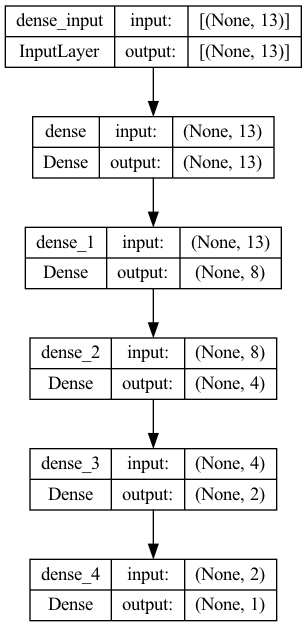

In [4]:
import keras

keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

In [5]:
X_train, Y_train = get_X_Y(train_data)
X_test, Y_test = get_X_Y(test_data)

history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=10,
    epochs=100,
    validation_data=(X_test, Y_test)
)

Epoch 1/100
   1/3500 [..............................] - ETA: 9:50 - loss: 0.7700 - accuracy: 0.3000

2023-05-16 15:19:24.299330: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3500/3500 [==============================] - 2s 486us/step - loss: 0.6132 - accuracy: 0.6630 - val_loss: 0.6024 - val_accuracy: 0.6712
Epoch 2/100
3500/3500 [==============================] - 2s 449us/step - loss: 0.6025 - accuracy: 0.6743 - val_loss: 0.6017 - val_accuracy: 0.6678
Epoch 3/100
3500/3500 [==============================] - 2s 454us/step - loss: 0.6010 - accuracy: 0.6740 - val_loss: 0.6005 - val_accuracy: 0.6724
Epoch 4/100
3500/3500 [==============================] - 2s 579us/step - loss: 0.5999 - accuracy: 0.6749 - val_loss: 0.6023 - val_accuracy: 0.6692
Epoch 5/100
3500/3500 [==============================] - 2s 482us/step - loss: 0.5980 - accuracy: 0.6768 - val_loss: 0.6016 - val_accuracy: 0.6702
Epoch 6/100
3500/3500 [==============================] - 2s 446us/step - loss: 0.5966 - accuracy: 0.6775 - val_loss: 0.5981 - val_accuracy: 0.6666
Epoch 7/100
3500/3500 [==============================] - 2s 452us/step - loss: 0.5943 - accuracy: 0.6809 - val_loss: 0.5947 - val_

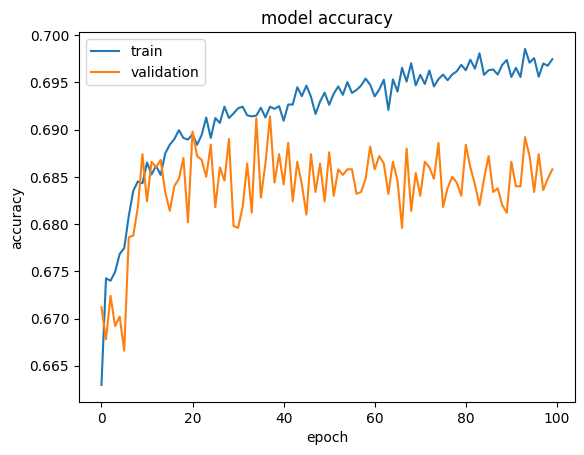

In [6]:
from matplotlib import pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

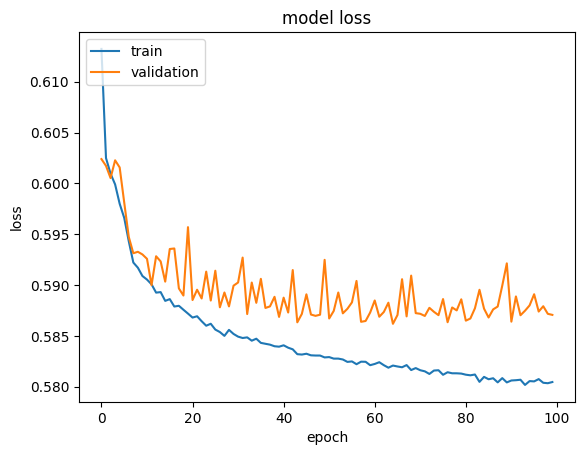

In [7]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
def get_Y_predicted(_X_data):
    return [
        row[0]
        for row in model.predict(_X_data)
    ]


In [9]:
# Оценка точности
Rand, Jaccard, Fowlkes_Mallows = get_accuracy(Y_test, get_Y_predicted(X_test))
print(
    f"Rand - {Rand}\n"
    f"Jaccard - {Jaccard}\n"
    f"Fowlkes_Mallows - {Fowlkes_Mallows}"
)

157/157 [==============================] - 0s 384us/step
Rand - 0.6858
Jaccard - 0.5219111381618989
Fowlkes_Mallows - 0.6858796249714105


In [10]:
# Функция для визуализации
CLUSTERS = [
    # (color, sign)
    ('red', 's'),
    ('blue', 'v'),
]


def visualization(first, second, xlabel, ylabel):
    for index, cluster in enumerate([first, second], start=1):
        color, sign = CLUSTERS[index - 1]
        plt.scatter(
            [row[0] for row in cluster],
            [row[1] for row in cluster],
            s=25,
            marker=sign,
            c=color,
            label=f'Кластер {index}'
        )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()


X_data, Y_data = get_X_Y(data)
Y_predict_data = [
    0 if y < 0.5 else 1
    for y in get_Y_predicted(X_data)
]


def get_cluster_data(X, Y, cluster):
    return [
        X[index]
        for index, y in enumerate(Y)
        if y == cluster
    ]


1250/1250 [==============================] - 0s 298us/step


Как должно быть


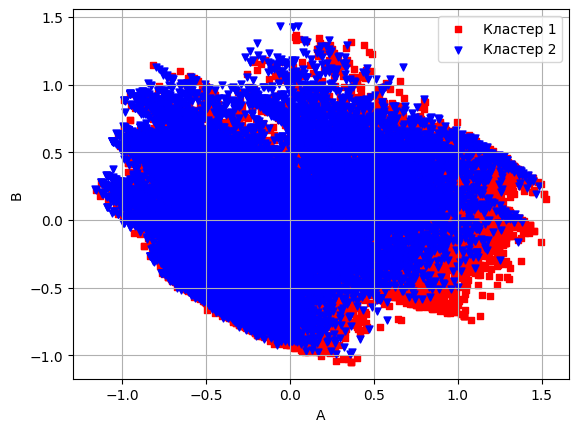

Как получилось


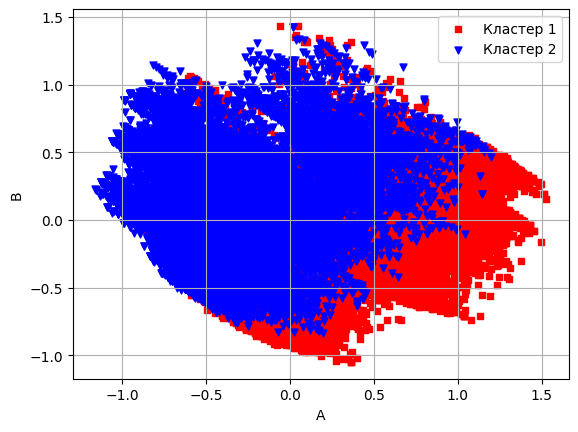

In [11]:
from sklearn.decomposition import PCA

# Визуализация главных компонент по обычным признакам ничего не понятно
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data)

print('Как должно быть')
visualization(
    get_cluster_data(X_pca, Y_data, 0),
    get_cluster_data(X_pca, Y_data, 1),
    'A',
    'B'
)

print('Как получилось')
visualization(
    get_cluster_data(X_pca, Y_predict_data, 0),
    get_cluster_data(X_pca, Y_predict_data, 1),
    'A',
    'B'
)

# Вывод

В ходе выполнения лабораторной работы была построена нейронная сеть прямого распространения с 5ю слоями
Исходя из результатов классификации следует, что нейронная сеть прямого распространения справилась с задачей со следующей точностью
Rand - 0.6886
Jaccard - 0.5348072901105467
Fowlkes_Mallows - 0.6970395471596799

Которая превосходит точность ансамблевых методов классификации на 2%
Rand
Boosting - 68.5%
Bagging - 67.5%
RandomForest - 68.5%


Jaccard
Boosting - 52.5%
Bagging - 52%
RandomForest - 51.5%


Fowlkes Mallows
Boosting - 68.75%
Bagging - 67%
RandomForest - 68%
